In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
jax.config.update('jax_platform_name', 'cpu')

In [3]:
from entot.data.data import create_gaussians, create_gaussian_split
from entot.plotting.plots import plot_1D
from entot.models.models import NoiseOutsourcingModel
from entot.models.utils import MixtureNormalSampler
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp

In [4]:
n_x = 100
n_y = 100
x = np.linspace(-0.3, 1.2, n_x)
y = np.linspace(-0.5, 0.5, n_y)
xx, yy = np.meshgrid(x,y)

x_fl = xx.flatten()
y_fl = yy.flatten()

concat = jnp.transpose(jnp.concatenate((jnp.atleast_2d(x_fl), jnp.atleast_2d(y_fl)), axis=0))
concat.shape

(10000, 2)

In [5]:
sample_source = MixtureNormalSampler([0], 1, 100, 0.5)



In [6]:
sample_target = MixtureNormalSampler([-1.0,1.0], 1, 100, 0.1)

In [7]:
source = sample_source(jax.random.PRNGKey(0))

In [8]:
source.shape

(100,)

In [9]:
target = sample_target(jax.random.PRNGKey(0))

In [10]:
T_xz = jnp.expand_dims(jnp.transpose(jnp.expand_dims(target, 0)), axis=-1) + 0.01 * jax.random.normal(jax.random.PRNGKey(0), shape=(100,1,10))

(<Figure size 1800x450 with 4 Axes>,
 array([<Axes: title={'center': 'Input $\\mathbb{P}$ (1D)'}, ylabel='Density'>,
        <Axes: title={'center': 'Target $\\mathbb{Q}$ (1D)'}, xlabel='Density'>,
        <Axes: title={'center': 'Learned $\\hat{\\pi}$ (2D), ours'}, xlabel='source', ylabel='mapped'>,
        <Axes: title={'center': 'Mapped $T_{\\sharp}(\\mathbb{P}\\times\\mathbb{S})$ (1D)'}, xlabel='Density'>],
       dtype=object))

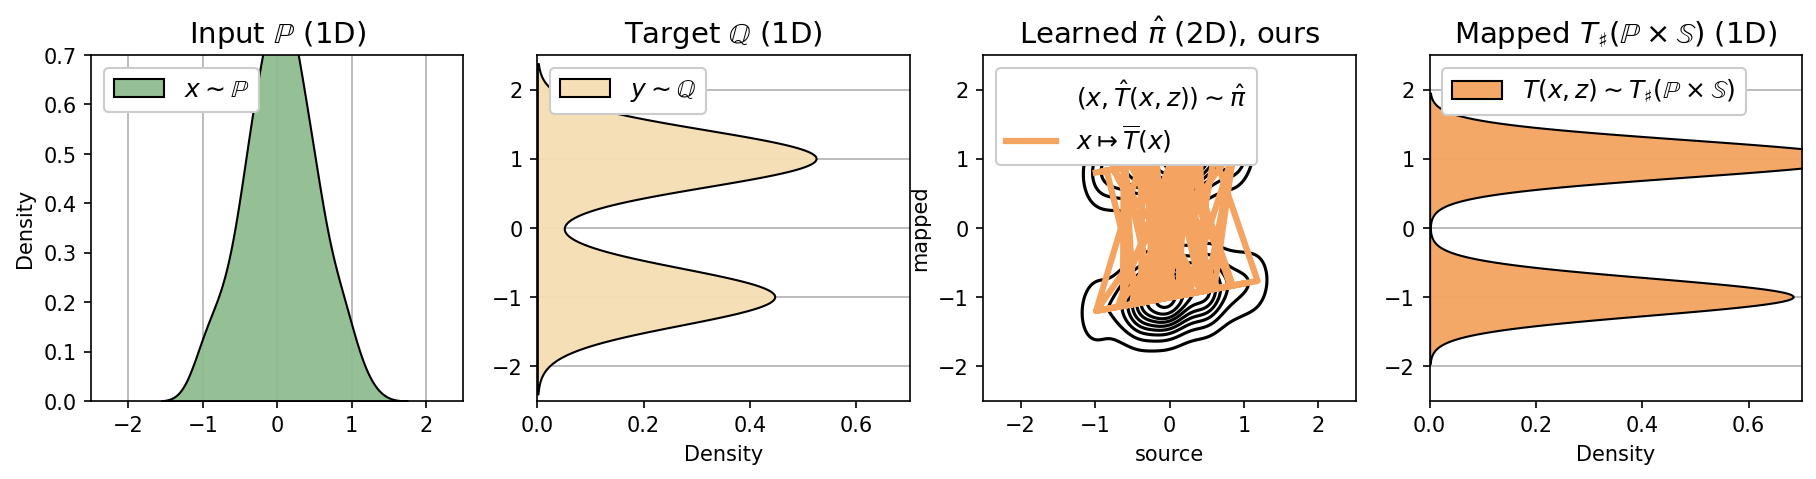

In [21]:
plot_1D(jnp.transpose(jnp.atleast_2d(source)), jnp.transpose(jnp.atleast_2d(target)), T_xz)

# Dataset 1

In [5]:
source, target = create_gaussians(100, 100, var_source=0.2, var_target=0.2)

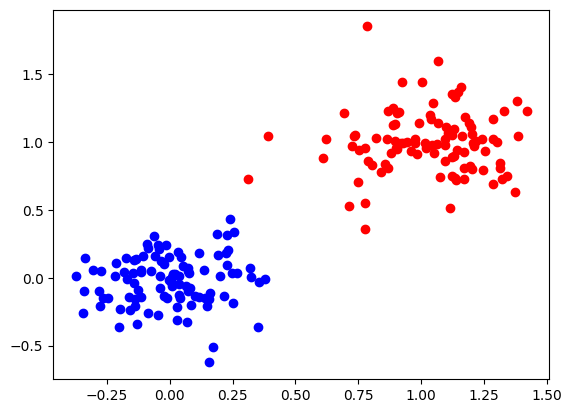

In [6]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")

In [54]:
sm = NoiseOutsourcingModel(1.0, 64, 64, iterations=100, inner_iterations=5, input_dim=2, noise_dim=2)


In [55]:
sm(source, target)

100%|██████████| 100/100 [01:54<00:00,  1.14s/it]


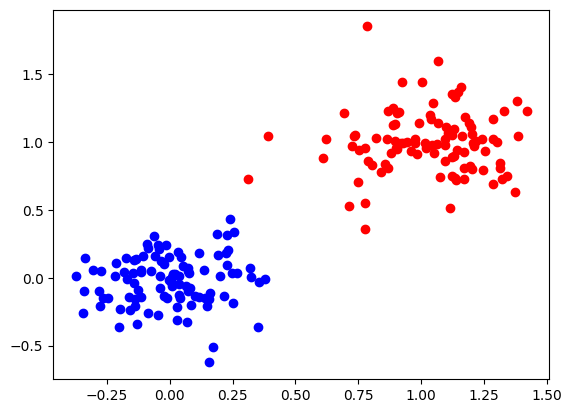

In [56]:
transported = sm.transport(source)
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(transported[:, 0], transported[:, 1], color="green", marker="P")

In [29]:
jnp.tile(source[0,None], (10,1)).shape

(10, 2)

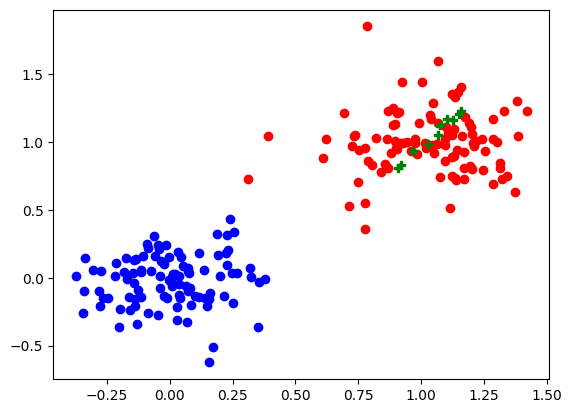

In [32]:
sampled = sm.sample(source[10,None])
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(sampled[:, 0], sampled[:, 1], color="green", marker="P")

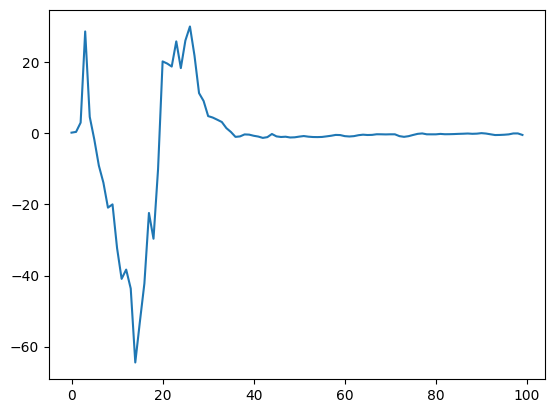

In [34]:
plt.plot(np.arange(len(sm.metrics["t_obj"])), sm.metrics["t_obj"])

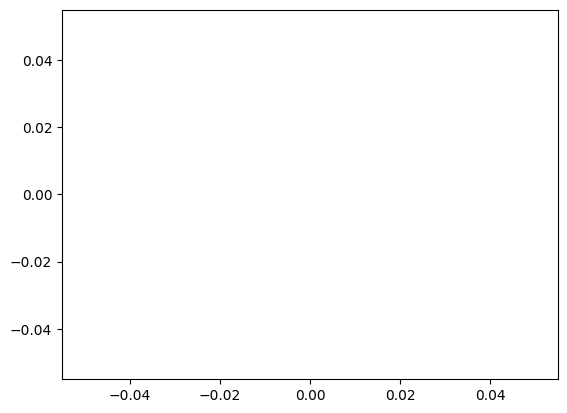

In [35]:
plt.plot(np.arange(len(sm.metrics["phi_obj"])), sm.metrics["phi_obj"])